### Library imports

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk

### Import of data

In [154]:
dataset = pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/train.csv')
test = pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/test.csv')
sample_solution = pd.read_csv('s3://rmit-ml-2020s1-lab-data/Assignment1_data/sample_solution.csv')

### Variable Declaration
Since we only have 1 target variable which is the TARGET_LifeExpectancy, 
we should put everything else in the X variable, as the assignment suggests that there is no feature selection.

In [164]:
X = dataset[['Country',
'Year',
'Status',
'AdultMortality',
'AdultMortality-Male',
'AdultMortality-Female',
'InfantDeaths',
'Alcohol',
'PercentageExpenditure',
'Measles',
'BMI',
'UnderFiveDeaths',
'Polio',
'TotalExpenditure',
'Diphtheria',
'HIV-AIDS',
'GDP',
'Population',
'Thinness1-19years',
'Thinness5-9years',
'IncomeCompositionOfResources',
'Schooling']]

Y = dataset.TARGET_LifeExpectancy

### Normalisation of dataset
We need to normalize the dataset because the values have a high range and we need to have the x values to share a common scale

In [172]:
normalized_dataset = dataset
normalized_dataset = (normalized_dataset - normalized_dataset.mean()) / (normalized_dataset.max() - normalized_dataset.min())
normalized_dataset = normalized_dataset.drop(columns='ID')

normalized_x = normalized_dataset[['Country',
'Year',
'Status',
'AdultMortality',
'AdultMortality-Male',
'AdultMortality-Female',
'InfantDeaths',
'Alcohol',
'PercentageExpenditure',
'Measles',
'BMI',
'UnderFiveDeaths',
'Polio',
'TotalExpenditure',
'Diphtheria',
'HIV-AIDS',
'GDP',
'Population',
'Thinness1-19years',
'Thinness5-9years',
'IncomeCompositionOfResources',
'Schooling']]

normalized_y = dataset.TARGET_LifeExpectancy

### Graphing of dataset

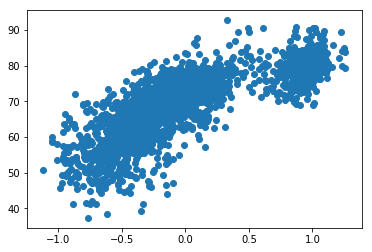

In [174]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
decomposed_data = pca.fit_transform(normalized_x)
x_values = pd.DataFrame(data=decomposed_data, columns=['x'])
plt.scatter(x_values['x'], normalized_y)

### Observations
Based on these observations we see that there is not a linear relationship between the life expectancy and the given x values. Hence, we must apply polynomial regression

### Normalisation of dataset

In [129]:
normalized_dataset = dataset
normalized_dataset = (normalized_dataset - normalized_dataset.mean()) / (normalized_dataset.max() - normalized_dataset.min())
normalized_dataset = normalized_dataset.drop(columns='ID')

#list(normalized_dataset.columns.values) 
#normalized_dataset

### Application of polynomial regression

Mean squared error 0.05653667594855757


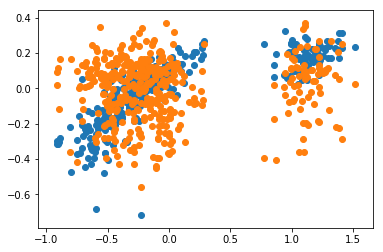

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

polyFeat = PolynomialFeatures(degree=2)
polyTrainX = polyFeat.fit_transform(trainX)
polyTestX = polyFeat.fit_transform(testX)
poly_model = linReg.fit(polyTrainX, trainY)
poly_prediction = poly_model.predict(polyTestX)

trainX, testX, trainY, testY = train_test_split(np.array(X), np.array(Y), test_size=0.2)

from sklearn.metrics import mean_squared_error
print('Mean squared error', mean_squared_error(testY, poly_prediction))

# Reduce the dimensions 
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca_data = pca.fit_transform(polyTestX)
pca_df = pd.DataFrame(data=pca_data, columns=['polyTestX'])

#prediction
pca_df['predict'] = poly_prediction
plt.scatter(pca_df['polyTestX'], pca_df['predict'])

#test
pca_df['testY'] = testY
plt.scatter(pca_df['polyTestX'], pca_df['testY'])

